# Project 4 - Fraud Detection Etherium - Cleaning the dataset

- Cleaning the dataset

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 4 -           Fraud Detection Etherium
- Date :                September 2024
- File(ipynb) :         1/3

## Step 1 : Install Required Libraries

In [ ]:
!pip install --upgrade pip
!pip install plotly==5.24.1
!pip install numpy pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


## Step 2 : Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Step 3 : Load The Dataset

In [ ]:
# Load the dataset
dataset_path = r'/content/drive/My Drive/Applied Machine Learning/Project 4 : Fraud Detection Etherium/datasets/transaction_dataset.csv'
#dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_4_Fraud_Detection_Etherium\datasets\transaction_dataset.csv'

df = pd.read_csv(dataset_path)
df.drop(['Unnamed: 0', 'Index', 'Address'], axis= 1, inplace=True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


- Display columns and their values

In [ ]:
def check_columns(df:pd.DataFrame) -> None:
    # Identify feature types
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    boolean_features = df.select_dtypes(include=['bool']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    print('>> Columns : ')
    print(f'> Numeric Features     is {numeric_features}')
    print(f'> Boolean Features     is {boolean_features}')
    print(f'> Categorical Features is {categorical_features}')
    print('>> Values : ')
    for feature in df.columns:
        print(f'> {feature} : {df[feature].unique().tolist()}')

In [ ]:
check_columns(df)

>> Columns : 
> Numeric Features     is ['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', ' Total ERC20 tnxs', ' ERC20 total Ether received', ' ERC20 total ether sent', ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', '

## Step 4 : Exploratory Data Analysis (EDA)

In [ ]:
def plot_pie_chart(df:pd.DataFrame, column:str, title:str) -> None:
    values = df[column].value_counts().values.tolist()
    names = df[column].value_counts().keys()
    fig = px.pie(df, values=values, names=names, title=title, color_discrete_sequence=px.colors.sequential.RdBu)
    fig.show()

In [ ]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


- FLAG analysis

In [ ]:
df.FLAG.value_counts()

,count
FLAG,
0,7662
1,2179


In [ ]:
df_flag = pd.DataFrame(
    data= [
        len(df.loc[df.FLAG == 0])/ len(df.FLAG) * 100,
        len(df.loc[df.FLAG == 1])/ len(df.FLAG) * 100 ],
    index= [
        'Non-Fraudulent instance',
        'Fraudulent instance'],
    columns= ['Percentage %'])

df_flag

,Percentage %
Non-Fraudulent instance,77.857941
Fraudulent instance,22.142059


In [ ]:
plot_pie_chart(df, 'FLAG', 'Target distribution of being Fraud or not')

- Check the missing values

In [ ]:
df.isnull().sum()

,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0
Unique Received From Addresses,0
Unique Sent To Addresses,0
min value received,0


- Check the duplicate values

In [ ]:
df.duplicated().sum()

546

## Step 5 : Data Cleaning

- Handle Category features

In [ ]:
cat_features = df.select_dtypes('object').columns.astype('category')
df[cat_features]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [ ]:
df.drop(cat_features, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

- Handle **missing values**

In [ ]:
# Handle Missing Values
print(f'> Number of samples before handling missing values is {len(df)}')
df.fillna(df.median(), inplace= True)
print(f'> Number of samples after handling missing values is {len(df)}')

> Number of samples before handling missing values is 9841
> Number of samples after handling missing values is 9841


- Handle **duplicates**

In [ ]:
# Handle Duplicates
print(f'> Number of samples before handling duplicates is {len(df)}')
df = df.drop_duplicates(ignore_index= True)
print(f'> Number of samples after handling duplicates is {len(df)}')

> Number of samples before handling duplicates is 9841
> Number of samples after handling duplicates is 9288


- Handle features with **Variance = 0**

In [ ]:
no_var = df.var() == 0
df_no_var = df.var()[no_var]
df_no_var

,0
ERC20 avg time between sent tnx,0.0
ERC20 avg time between rec tnx,0.0
ERC20 avg time between rec 2 tnx,0.0
ERC20 avg time between contract tnx,0.0
ERC20 min val sent contract,0.0
ERC20 max val sent contract,0.0
ERC20 avg val sent contract,0.0


In [ ]:
df.drop(df_no_var.index, axis=1, inplace=True)
df.var()

,0
FLAG,1.465214e-01
Avg min between sent tnx,4.863416e+08
Avg min between received tnx,5.588576e+08
Time Diff between first and last (Mins),1.073089e+11
Sent tnx,6.066685e+05
Received Tnx,9.362057e+05
Number of Created Contracts,2.119730e+04
Unique Received From Addresses,9.442696e+04
Unique Sent To Addresses,7.370284e+04
min value received,1.123766e+05


- Handle features with **same correlation**

In [ ]:
def plot_corr(df:pd.DataFrame):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style('white'):
        fig, ax = plt.subplots(figsize=(60,60))
        sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

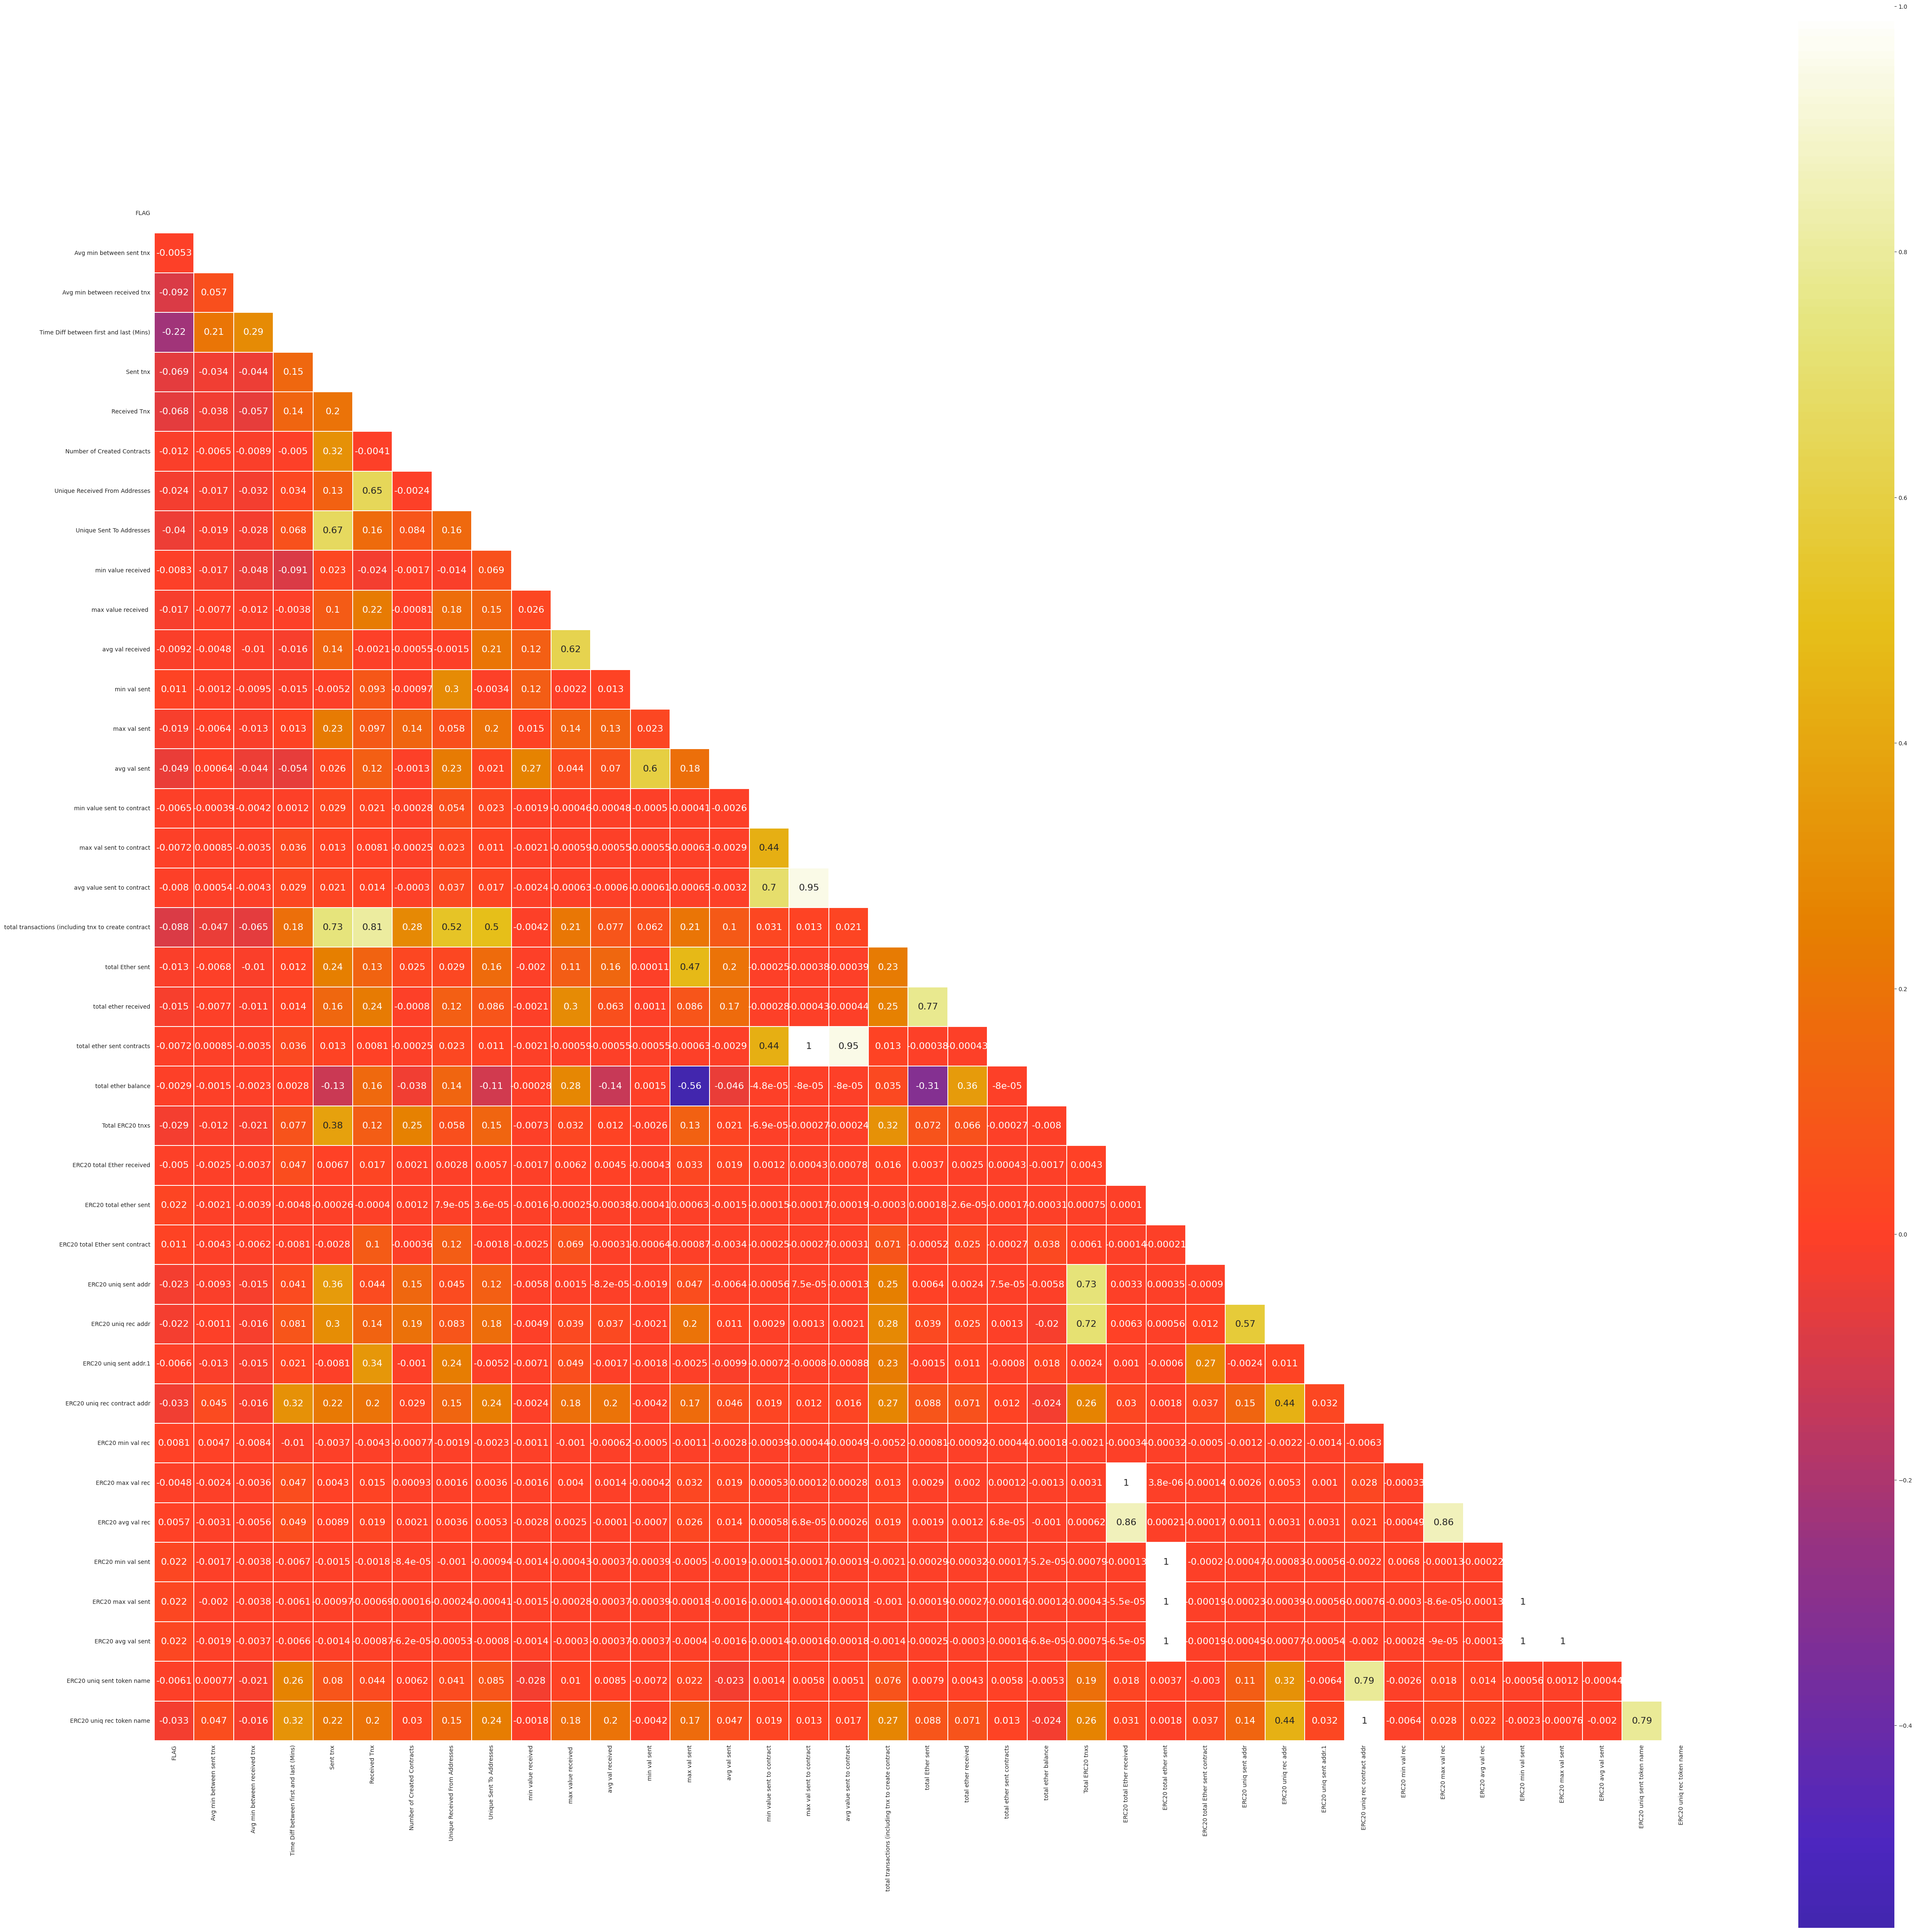

In [ ]:
plot_corr(df)

In [ ]:
corr = df.corr()
sorted_corr = corr.sort_values(by=['FLAG'], key=abs)
sorted_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
total ether balance,-0.002899,-0.001509,-0.002280,0.002764,-0.127357,0.158225,-0.037912,0.144957,-0.113496,-0.000279,...,0.018351,-0.023927,-0.000180,-0.001255,-0.000998,-0.000052,-0.000116,-0.000068,-0.005251,-0.023952
ERC20 max val rec,-0.004833,-0.002416,-0.003565,0.046522,0.004346,0.015419,0.000929,0.001623,0.003631,-0.001615,...,0.001017,0.027540,-0.000330,1.000000,0.859766,-0.000128,-0.000086,-0.000090,0.017700,0.028442
ERC20 total Ether received,-0.005012,-0.002500,-0.003678,0.046803,0.006739,0.016542,0.002080,0.002762,0.005743,-0.001670,...,0.000996,0.029983,-0.000341,0.999967,0.859823,-0.000132,-0.000055,-0.000065,0.018301,0.030880
Avg min between sent tnx,-0.005326,1.000000,0.056685,0.208138,-0.034406,-0.038162,-0.006549,-0.017315,-0.019031,-0.016596,...,-0.012555,0.045224,0.004653,-0.002416,-0.003092,-0.001656,-0.001985,-0.001932,0.000766,0.046830
ERC20 avg val rec,0.005750,-0.003092,-0.005648,0.049138,0.008936,0.019200,0.002066,0.003626,0.005302,-0.002758,...,0.003149,0.021329,-0.000486,0.859766,1.000000,-0.000218,-0.000129,-0.000134,0.013614,0.022101
ERC20 uniq sent token name,-0.006147,0.000766,-0.020678,0.264387,0.080376,0.043756,0.006221,0.041061,0.085364,-0.027799,...,-0.006400,0.786902,-0.002591,0.017700,0.013614,-0.000557,0.001156,-0.000444,1.000000,0.788169
min value sent to contract,-0.006485,-0.000389,-0.004200,0.001239,0.029428,0.020524,-0.000282,0.053882,0.023112,-0.001923,...,-0.000718,0.018777,-0.000394,0.000531,0.000582,-0.000152,-0.000143,-0.000142,0.001394,0.019196
ERC20 uniq sent addr.1,-0.006638,-0.012555,-0.014800,0.020615,-0.008129,0.337640,-0.001045,0.241542,-0.005197,-0.007123,...,1.000000,0.031861,-0.001448,0.001017,0.003149,-0.000565,-0.000561,-0.000543,-0.006400,0.032059
max val sent to contract,-0.007182,0.000850,-0.003539,0.036119,0.013138,0.008097,-0.000248,0.023176,0.010843,-0.002129,...,-0.000795,0.012180,-0.000436,0.000123,0.000068,-0.000169,-0.000164,-0.000160,0.005776,0.012539
total ether sent contracts,-0.007182,0.000850,-0.003539,0.036119,0.013138,0.008097,-0.000248,0.023176,0.010843,-0.002129,...,-0.000795,0.012180,-0.000436,0.000123,0.000068,-0.000169,-0.000164,-0.000160,0.005776,0.012540


In [ ]:
corr['min val sent']

,min val sent
FLAG,0.011425
Avg min between sent tnx,-0.001247
Avg min between received tnx,-0.009476
Time Diff between first and last (Mins),-0.014624
Sent tnx,-0.005159
Received Tnx,0.093182
Number of Created Contracts,-0.000967
Unique Received From Addresses,0.296135
Unique Sent To Addresses,-0.003364
min value received,0.117518


In [ ]:
# Drop one of those highly correlated features
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts',
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'avg value sent to contract',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

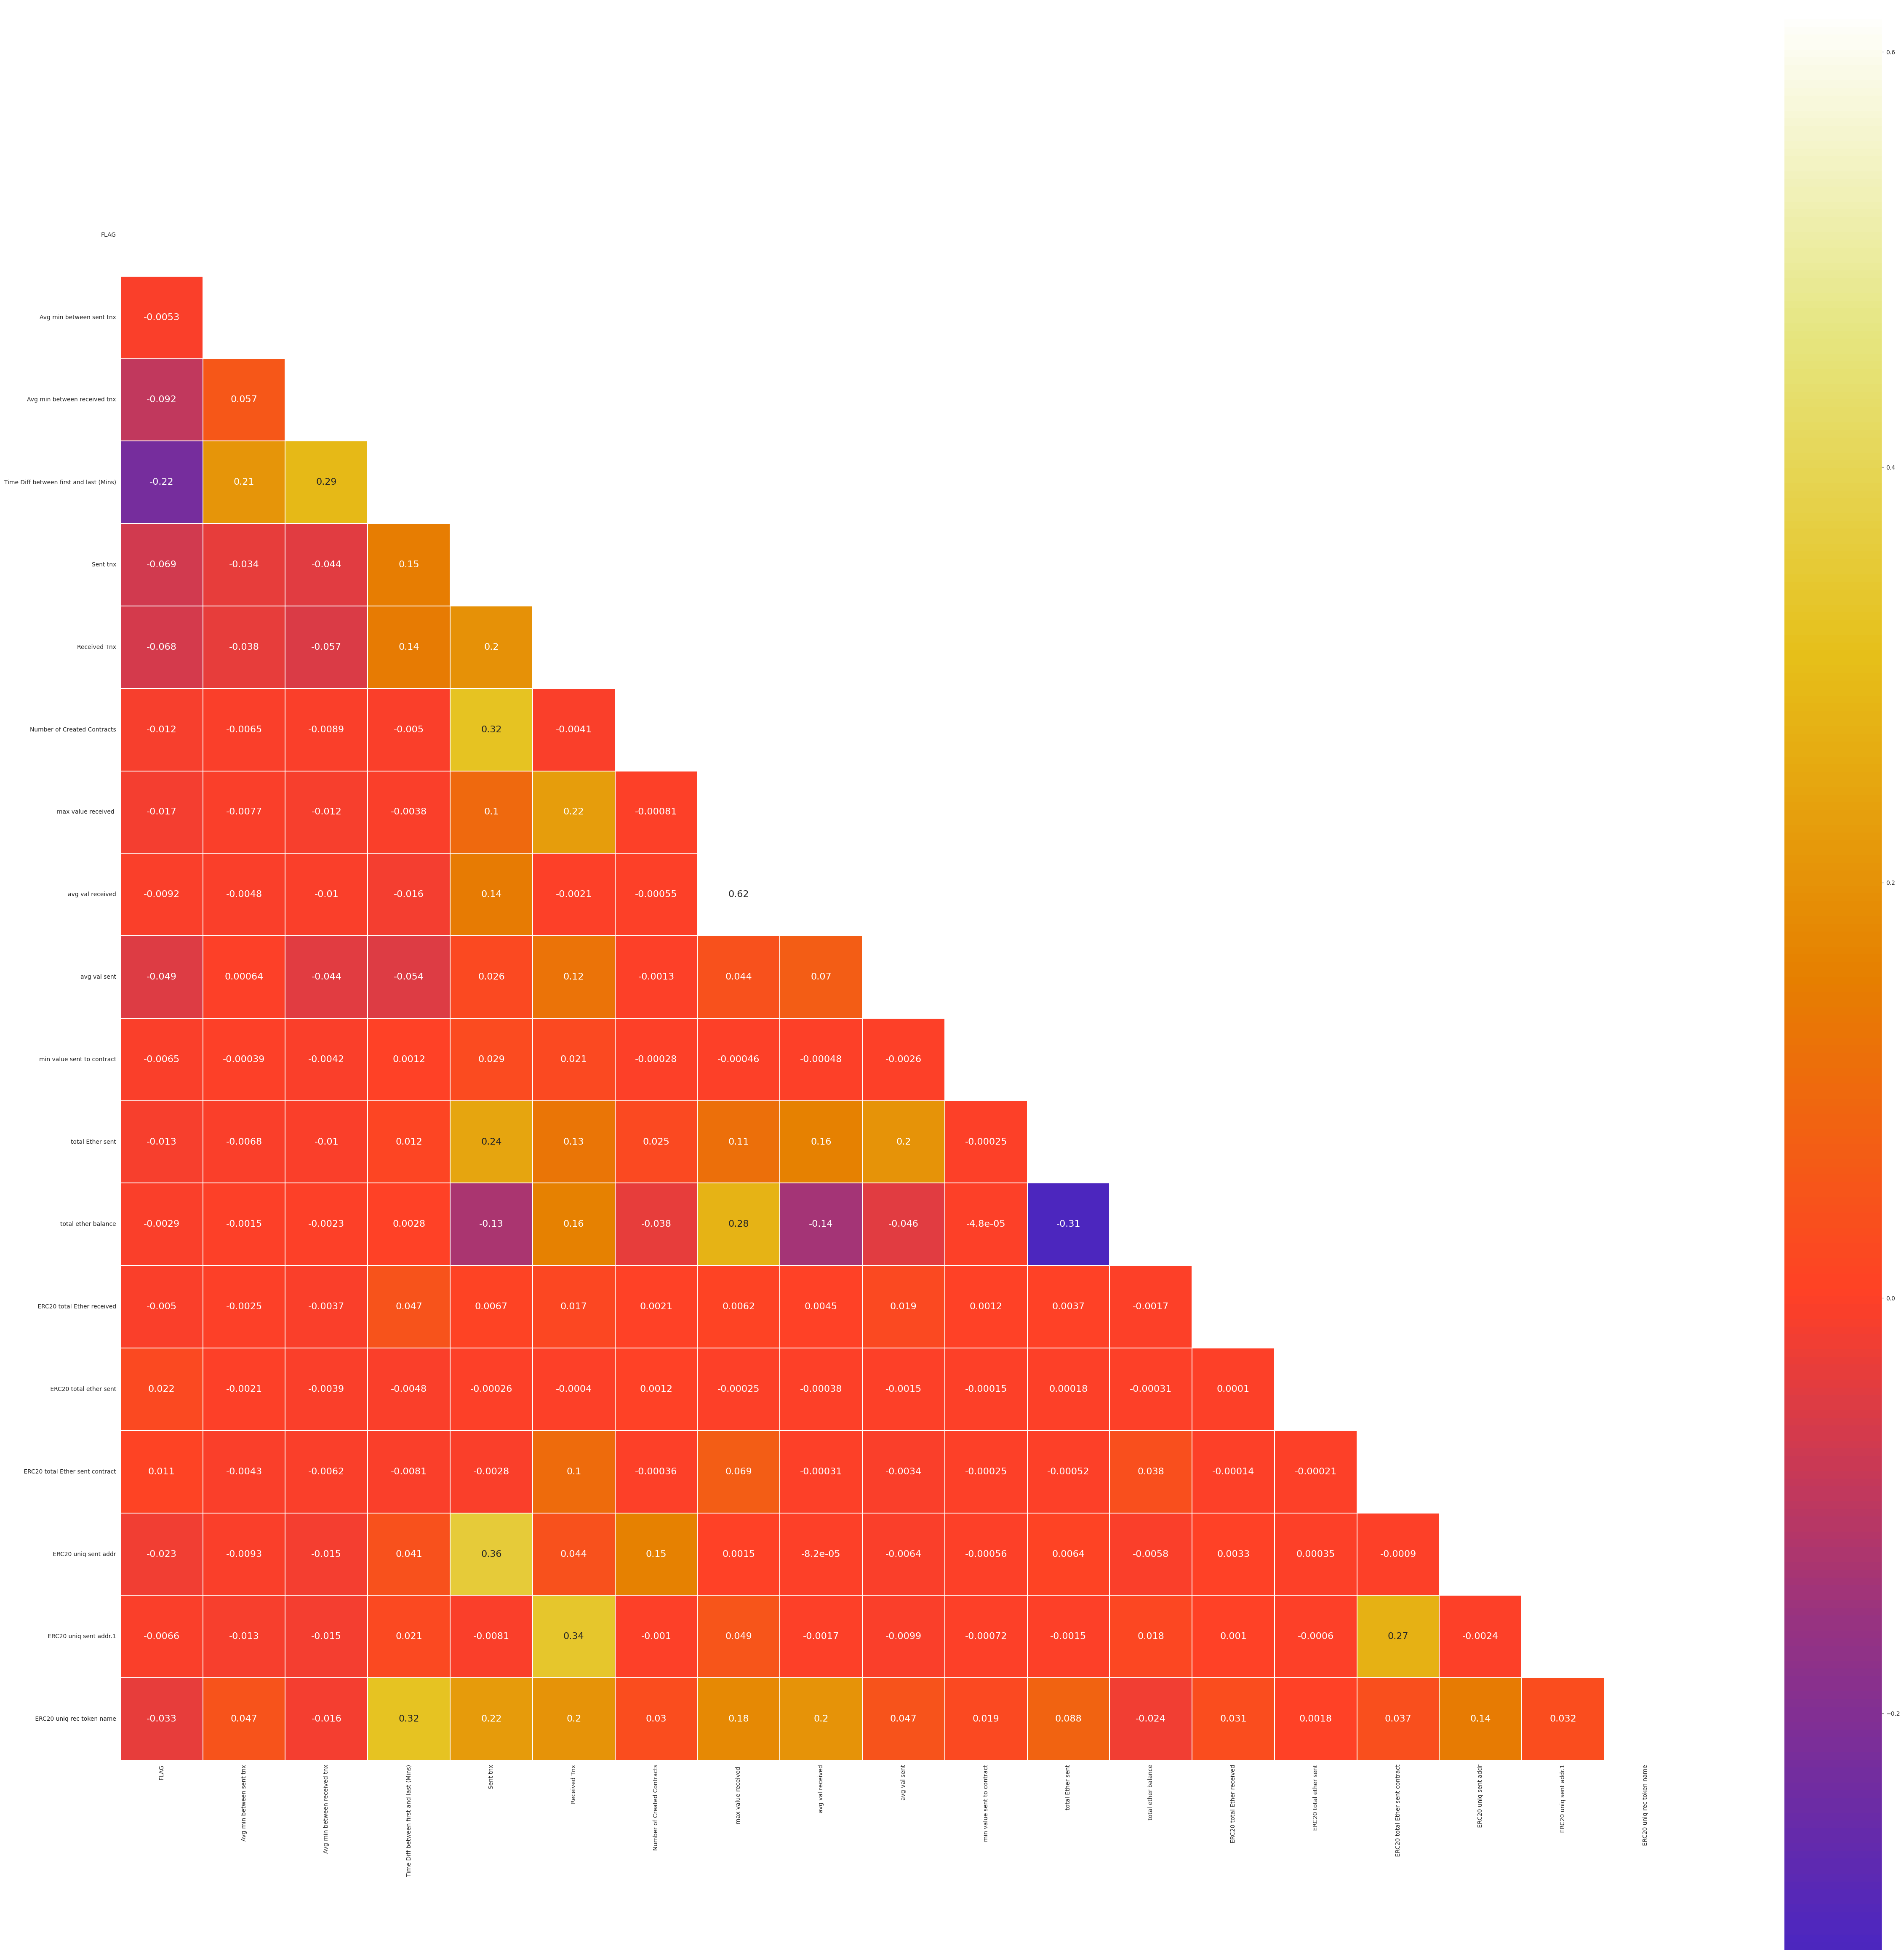

In [ ]:
plot_corr(df)

In [ ]:
columns = df.columns.tolist()
columns

['FLAG',
 'Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'max value received ',
 'avg val received',
 'avg val sent',
 'min value sent to contract',
 'total Ether sent',
 'total ether balance',
 ' ERC20 total Ether received',
 ' ERC20 total ether sent',
 ' ERC20 total Ether sent contract',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq sent addr.1',
 ' ERC20 uniq rec token name']

- Handle features that are mosty **0s**

In [ ]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
min value sent to contract
0.00    9286
0.02       1
0.01       1
Name: count, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
 ERC20 uniq sent addr.1
0.0    9260
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64


In [ ]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9288, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


- Correct the name of features

In [ ]:
cols = df.columns.tolist()
for index, col in enumerate(cols):
    print(f"> {index + 1} : {col} -> {df[col].unique().tolist()}")

> 1 : FLAG -> [0, 1]
> 2 : Avg min between sent tnx -> [844.26, 12709.07, 246194.54, 10219.6, 36.61, 9900.12, 69.46, 1497.39, 0.0, 2570.59, 32.45, 3716.41, 9520.7, 14106.66, 757.91, 3.13, 27681.45, 770.29, 163.78, 725.77, 91.14, 2477.34, 1797.42, 155.22, 14626.26, 3.33, 1128.56, 2152.95, 45.91, 1067.84, 1051.87, 2.12, 17441.04, 45561.42, 379.78, 1478.05, 164.22, 1790.44, 803.95, 18649.44, 65.85, 181.7, 23359.72, 20827.93, 4183.18, 1969.46, 76.32, 26.01, 8174.66, 628.48, 22.94, 7750.02, 621.07, 13243.1, 5815.7, 1905.13, 24.63, 59.56, 56814.86, 2.23, 52.48, 1466.39, 25905.07, 3834.85, 3880.52, 21466.84, 1904.23, 248.61, 10154.24, 674.61, 3517.86, 20.41, 244.78, 408.32, 5801.32, 3.6, 13.67, 193.0, 20981.23, 129.61, 5.88, 21.65, 31239.32, 997.32, 9.02, 3.62, 15.48, 63819.21, 161.67, 5.05, 157.32, 36.98, 3.21, 108.58, 26.4, 3500.97, 2809.83, 19121.43, 1396.24, 30200.21, 24.47, 1449.95, 5.13, 24.86, 20.87, 6.0, 155.16, 13.6, 364.17, 1.97, 8197.19, 161.06, 5.95, 93612.1, 5.75, 5.66, 72100.0, 

In [ ]:
dict = {}
for column in df.drop(['FLAG'], axis=1).columns.tolist():
    dict[column] = column.strip().capitalize()

df.rename(columns=dict, inplace=True)
df.rename(columns={
    'Time diff between first and last (mins)' : 'Time difference between first and last (mins)',
    'Avg val received' : 'Avg value received',
    'Avg val sent' : 'Avg value sent',
    'Total ether sent' : 'Total either sent',
    'Total ether balance' : 'Total either balance',
    'Erc20 total ether received' : 'ERC20 total either received',
    'Erc20 total ether sent' : 'ERC20 total either sent',
    'Erc20 total ether sent contract' : 'ERC20 total either sent contract',
    'Erc20 uniq sent addr' : 'ERC20 unique sent address',
    'Erc20 uniq rec token name' : 'ERC20 unique received token name',
}, inplace=True)

In [ ]:
columns = df.columns.tolist()
columns

['FLAG',
 'Avg min between sent tnx',
 'Avg min between received tnx',
 'Time difference between first and last (mins)',
 'Sent tnx',
 'Received tnx',
 'Number of created contracts',
 'Max value received',
 'Avg value received',
 'Avg value sent',
 'Total either sent',
 'Total either balance',
 'ERC20 total either received',
 'ERC20 total either sent',
 'ERC20 total either sent contract',
 'ERC20 unique sent address',
 'ERC20 unique received token name']

## Step 6: Save The Cleaned Dataset

In [ ]:
dataset_path = r'/content/drive/My Drive/Applied Machine Learning/Project 4 : Fraud Detection Etherium/datasets/cleaned_transaction_dataset.csv'
#dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_4_Fraud_Detection_Etherium\datasets\cleaned_transaction_dataset.csv'

df.to_csv(dataset_path, index= False)
print(f"> Cleaned dataset Saved to {dataset_path}")

> Cleaned dataset Saved to /content/drive/My Drive/Applied Machine Learning/Project 4 : Fraud Detection Etherium/datasets/cleaned_transaction_dataset.csv
